# COVID-19: Growth dynamics of SARS-COV2 in Portugal and NY State. 

This code uses the data repository of the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). 

In [415]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline  

In [416]:
data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [417]:
df = pd.read_csv(data)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [419]:
df = df[(df['Country/Region'] == 'Portugal') | (df['Province/State'] == 'New York')]
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
184,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,448,785,1020,1280,1600,2060,2362,2995,3544,4268


In [420]:
df = df.replace(to_replace = ['US'], value ='New York') 

In [421]:
df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
df = df.set_index(['Country/Region'])

In [422]:
df = df.transpose()[40:] #data availability for Portugal starts on 3/2/20. New York still empty. 
df

Country/Region,Portugal
3/2/20,2
3/3/20,2
3/4/20,5
3/5/20,8
3/6/20,13
3/7/20,20
3/8/20,30
3/9/20,30
3/10/20,41
3/11/20,59


# Total Number of Cases

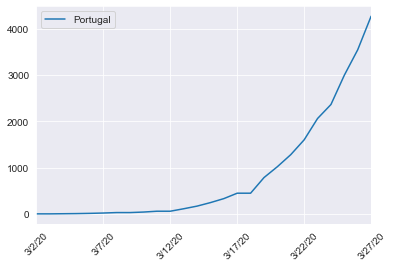

In [423]:
df.plot()
plt.grid(True)
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.show()

# Total Number of New Cases

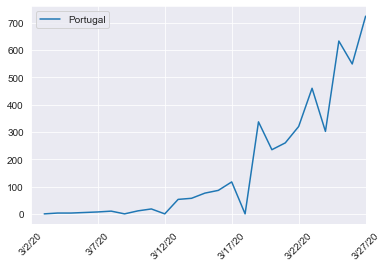

In [424]:
df_newcases = df.diff()
df_newcases.plot()
plt.grid(True)
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.show()

# Daily of Percentage Increase  

### 3 day moving average

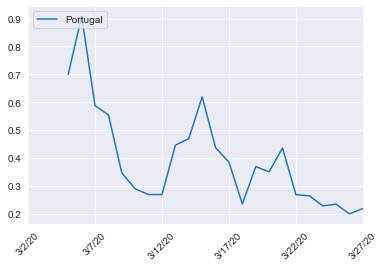

In [425]:
df_movingavg = df.pct_change().rolling(window=3).mean()
df_movingavg.plot()
plt.grid(True)
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.show()

### 5 day moving average

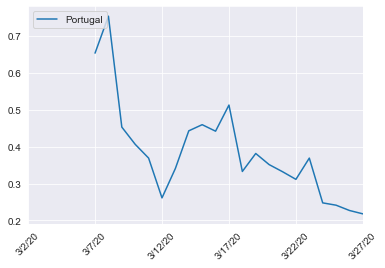

In [426]:
df_movingavg = df.pct_change().rolling(window=5).mean()
df_movingavg.plot()
plt.grid(True)
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.show()

In [427]:
# Manual Analysis (daily data from [this](https://coronavirus.app/map) website.)

In [428]:
dportugal_manual = [2,4,6,9,13,21,30,39,41,59,78,112,169,245,331,448,642,785,1020,1280,1600,2060,2362, 2995, 3544, 4268]
dnyc_manual = [0, 0, 0, 0, 0, 0, 0, 0, 173, 220, 328, 421, 525, 732, 967, 1706, 2495, 5365, 8310, 11719, 15793, 20875, 26236, 30811, 37769,44892] 
dates = np.arange(np.datetime64('today') - len(dportugal_manual), np.datetime64('today') + 2, dtype='datetime64[D]')

dup10days = [(2**(1/10)-1)*100]*len(dportugal_manual)
dup5days = [(2**(1/5)-1)*100]*len(dportugal_manual)
dup3days = [(2**(1/3)-1)*100]*len(dportugal_manual)
dup2days = [(2**(1/2)-1)*100]*len(dportugal_manual)

In [429]:
dataset = np.array(list(zip(dates, dportugal_manual, dnyc_manual)))
dataset = pd.DataFrame({'Day': dataset[:, 0], 'Portugal': dataset[:, 1], 'New York': dataset[:, 2]})
df = dataset.set_index(['Day'], inplace = True)

In [430]:
df_newcases = dataset.diff()

In [431]:
df_movingavg = dataset.pct_change().rolling(window=3).mean()


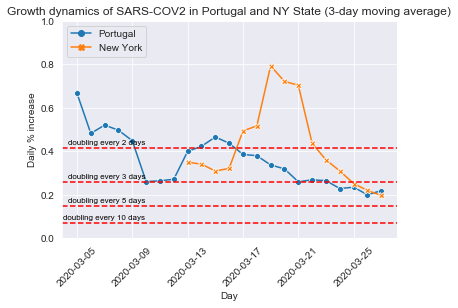

In [432]:
sns.set_style("darkgrid")
chart = sns.lineplot(markers=True, dashes=False, data=df_movingavg)
plt.grid(True)
plt.title('Growth dynamics of SARS-COV2 in Portugal and NY State (3-day moving average)')
plt.legend(loc=2)
plt.xticks(rotation=45)
plt.ylim(0, 1)
chart.text(0.25, 2**(1/10)-1 + 0.01, 'doubling every 10 days',
        verticalalignment='bottom', horizontalalignment='right',
        transform=chart.transAxes,
        color='black', fontsize=8)
chart.text(0.25, 2**(1/5)-1 + 0.01, 'doubling every 5 days',
        verticalalignment='bottom', horizontalalignment='right',
        transform=chart.transAxes,
        color='black', fontsize=8)       
chart.text(0.25, 2**(1/3)-1 + 0.01, 'doubling every 3 days',
        verticalalignment='bottom', horizontalalignment='right',
        transform=chart.transAxes,
        color='black', fontsize=8)        
chart.text(0.25, 2**(1/2)-1 + 0.01, 'doubling every 2 days',
        verticalalignment='bottom', horizontalalignment='right',
        transform=chart.transAxes,
        color='black', fontsize=8)             
chart.axhline(y=2**(1/10)-1, color='r', linestyle='--')
chart.axhline(y=2**(1/5)-1, color='r', linestyle='--')
chart.axhline(y=2**(1/3)-1, color='r', linestyle='--')
chart.axhline(y=2**(1/2)-1, color='r', linestyle='--')
chart.set_ylabel('Daily % increase')
plt.savefig('sars-cov2.png')
plt.show()


In [433]:

df_movingavg

,Portugal,New York
Day,,
2020-03-02,NaN,NaN
2020-03-03,NaN,NaN
2020-03-04,NaN,NaN
2020-03-05,0.666667,NaN
2020-03-06,0.481481,NaN
2020-03-07,0.519943,NaN
2020-03-08,0.496133,NaN
2020-03-09,0.447985,NaN
2020-03-10,0.259951,NaN
